In [1]:
from __future__ import print_function
import re
import os
import numpy as np
import pandas as pd
from collections import Counter
import csv
from keras.models import model_from_json
from keras.preprocessing import sequence
from keras.models import Sequential,Model
from keras.layers import Dense, Embedding,BatchNormalization,Input
from keras.layers import LSTM
from keras.datasets import imdb
#import import_ipynb
#import logfile_extraction 
from sklearn.model_selection import train_test_split
from keras import optimizers
import matplotlib.pyplot as plt
import keras 
import keras_metrics
import keras.backend as K
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from keras.callbacks import LambdaCallback

Using TensorFlow backend.


In [2]:
list_max_size=0
list_1dim=[]
list_2dim=[]

In [63]:
def number_of_function():
    pattern = re.compile(r'(driver|extli).+\)')
    for (root,dirs,files) in os.walk('C:\MasterThesis\document\Logs\log files', topdown=True): 

        if len(files)>0:
            for loop in range(len(files)):
                if files[loop].endswith((".txt")):  
                    with open(root+'/'+files[loop], 'r') as f:
                        contents=f.read()
                        matches=pattern.finditer(contents)
                        for j,match in enumerate(matches):
                            list_1dim.append(str(match.group()))
    counts = Counter(list_1dim) # count word frequency
    list=set(list_1dim)
    my_dict = {k: i  for i ,k in enumerate( list)}
    return my_dict
my_dict=number_of_function()
print(my_dict)

{'extli.rear_fog_light()': 0, 'extli.verify_indicate_off()': 1, 'driver.press_brake()': 2, 'extli.verify_hazard_lights_on()': 3, 'extli.verify_rear_fog_light_on()': 4, 'driver.verify_usage_mode_active()': 5, 'extli.indicate_left()': 6, 'driver.usage_mode_driving()': 7, 'extli.verify_beam_shape_off()': 8, 'extli.verify_front_fog_light_off()': 9, 'driver.verify_usage_mode_driving()': 10, 'extli.verify_light_switch_off()': 11, 'driver.usage_mode_inactive()': 12, 'extli.release_turn_stalk()': 13, 'extli.verify_light_switch_lowbeam()': 14, 'extli.verify_light_switch_auto()': 15, 'extli.verify_light_switch_position()': 16, 'extli.verify_rear_fog_light_off()': 17, 'driver.verify_usage_mode_convenience()': 18, 'driver.usage_mode_convenience()': 19, 'driver.release_brake()': 20, 'extli.verify_brake_lights_off()': 21, 'extli.verify_low_beam_on()': 22, 'extli.front_fog_light()': 23, 'extli.light_switch_auto()': 24, 'driver.usage_mode_active()': 25, 'extli.indicate_right()': 26, 'extli.light_switc

In [64]:
#my_dict={'extli.light_switch_position()': 0, 'extli.push_hazard_button()': 1, 'driver.usage_mode_inactive()': 2, 'extli.release_turn_stalk()': 3, 'extli.verify_rear_fog_light_on()': 4, 'extli.verify_brake_lights_off()': 5, 'extli.front_fog_light()': 6, 'extli.light_switch_auto()': 7, 'extli.indicate_left()': 8, 'extli.verify_rear_fog_light_off()': 9, 'extli.verify_front_fog_light_off()': 10, 'extli.verify_indicate_off()': 11, 'driver.verify_usage_mode_convenience()': 12, 'extli.light_switch_off()': 13, 'extli.verify_light_switch_position()': 14, 'driver.usage_mode_convenience()': 15, 'driver.release_brake()': 16, 'extli.verify_main_beam_on()': 17, 'driver.verify_usage_mode_active()': 18, 'extli.verify_light_switch_off()': 19, 'extli.verify_low_beam_on()': 20, 'driver.verify_usage_mode_inactive()': 21, 'extli.verify_light_switch_auto()': 22, 'extli.indicate_neutral()': 23, 'extli.verify_indicate_left_on()': 24, 'extli.verify_light_switch_lowbeam()': 25, 'extli.verify_hazard_lights_on()': 26, 'extli.indicate_right()': 27, 'extli.pull_turn_stalk()': 28, 'driver.usage_mode_active()': 29, 'extli.verify_front_fog_light_on()': 30, 'extli.verify_beam_shape_off()': 31, 'driver.press_brake()': 32, 'extli.light_switch_lowbeam()': 33, 'driver.verify_usage_mode_driving()': 34, 'driver.usage_mode_driving()': 35, 'extli.verify_indicate_right_on()': 36, 'extli.verify_brake_lights_on()': 37, 'extli.rear_fog_light()': 38}
#print(my_dict)

In [3]:
my_dict={'extli.light_switch_position()': 0, 'extli.push_hazard_button()': 1, 'driver.usage_mode_inactive()': 2, 'extli.release_turn_stalk()': 3, 'extli.verify_rear_fog_light_on()': 4, 'extli.verify_brake_lights_off()': 5, 'extli.front_fog_light()': 6, 'extli.light_switch_auto()': 7, 'extli.indicate_left()': 8, 'extli.verify_rear_fog_light_off()': 9, 'extli.verify_front_fog_light_off()': 10, 'extli.verify_indicate_off()': 11, 'driver.verify_usage_mode_convenience()': 12, 'extli.light_switch_off()': 13, 'extli.verify_light_switch_position()': 14, 'driver.usage_mode_convenience()': 15, 'driver.release_brake()': 16, 'extli.verify_main_beam_on()': 17, 'driver.verify_usage_mode_active()': 18, 'extli.verify_light_switch_off()': 19, 'extli.verify_low_beam_on()': 20, 'driver.verify_usage_mode_inactive()': 21, 'extli.verify_light_switch_auto()': 22, 'extli.indicate_neutral()': 23, 'extli.verify_indicate_left_on()': 24, 'extli.verify_light_switch_lowbeam()': 25, 'extli.verify_hazard_lights_on()': 26, 'extli.indicate_right()': 27, 'extli.pull_turn_stalk()': 28, 'driver.usage_mode_active()': 29, 'extli.verify_front_fog_light_on()': 30, 'extli.verify_beam_shape_off()': 31, 'driver.press_brake()': 32, 'extli.light_switch_lowbeam()': 33, 'driver.verify_usage_mode_driving()': 34, 'driver.usage_mode_driving()': 35, 'extli.verify_indicate_right_on()': 36, 'extli.verify_brake_lights_on()': 37, 'extli.rear_fog_light()': 38}
print(my_dict)

{'extli.light_switch_position()': 0, 'extli.push_hazard_button()': 1, 'driver.usage_mode_inactive()': 2, 'extli.release_turn_stalk()': 3, 'extli.verify_rear_fog_light_on()': 4, 'extli.verify_brake_lights_off()': 5, 'extli.front_fog_light()': 6, 'extli.light_switch_auto()': 7, 'extli.indicate_left()': 8, 'extli.verify_rear_fog_light_off()': 9, 'extli.verify_front_fog_light_off()': 10, 'extli.verify_indicate_off()': 11, 'driver.verify_usage_mode_convenience()': 12, 'extli.light_switch_off()': 13, 'extli.verify_light_switch_position()': 14, 'driver.usage_mode_convenience()': 15, 'driver.release_brake()': 16, 'extli.verify_main_beam_on()': 17, 'driver.verify_usage_mode_active()': 18, 'extli.verify_light_switch_off()': 19, 'extli.verify_low_beam_on()': 20, 'driver.verify_usage_mode_inactive()': 21, 'extli.verify_light_switch_auto()': 22, 'extli.indicate_neutral()': 23, 'extli.verify_indicate_left_on()': 24, 'extli.verify_light_switch_lowbeam()': 25, 'extli.verify_hazard_lights_on()': 26, 'e

In [66]:
#my_dict={'extli.light_switch_position()': 0, 'extli.push_hazard_button()': 1, 'driver.usage_mode_inactive()': 2, 'extli.release_turn_stalk()': 3, 'extli.verify_rear_fog_light_on()': 4, 'extli.verify_brake_lights_off()': 5, 'extli.front_fog_light()': 6, 'extli.light_switch_auto()': 7, 'extli.indicate_left()': 8, 'extli.verify_rear_fog_light_off()': 9, 'extli.verify_front_fog_light_off()': 70, 'extli.verify_indicate_off()': 100, 'driver.verify_usage_mode_convenience()': 12, 'extli.light_switch_off()': 13, 'extli.verify_light_switch_position()': 14, 'driver.usage_mode_convenience()': 15, 'driver.release_brake()': 16, 'extli.verify_main_beam_on()': 17, 'driver.verify_usage_mode_active()': 18, 'extli.verify_light_switch_off()': 19, 'extli.verify_low_beam_on()': 20, 'driver.verify_usage_mode_inactive()': 21, 'extli.verify_light_switch_auto()': 22, 'extli.indicate_neutral()': 23, 'extli.verify_indicate_left_on()': 24, 'extli.verify_light_switch_lowbeam()': 25, 'extli.verify_hazard_lights_on()': 26, 'extli.indicate_right()': 27, 'extli.pull_turn_stalk()': 28, 'driver.usage_mode_active()': 29, 'extli.verify_front_fog_light_on()': 30, 'extli.verify_beam_shape_off()': 31, 'driver.press_brake()': 32, 'extli.light_switch_lowbeam()': 33, 'driver.verify_usage_mode_driving()': 34, 'driver.usage_mode_driving()': 35, 'extli.verify_indicate_right_on()': 36, 'extli.verify_brake_lights_on()': 37, 'extli.rear_fog_light()': 38}
#print(my_dict)
# this is for 03-01 value changed 10 11 to 70 100

In [4]:
# convert test case to csv-file
log_dict={}
pattern = re.compile(r'(driver|extli).+\)')
for (root,dirs,files) in os.walk('C:\MasterThesis\document\Logs\Feb 22', topdown=True): 
    if len(files)>0:
        for loop in range(len(files)):
            if files[loop].endswith((".txt")):
                with open(root+'/'+files[loop], 'r') as f:
                    contents=f.read()
                    matches=pattern.finditer(contents)
                    list_1dim=[]
                    for j,match in enumerate(matches):
                        list_1dim.append(str(match.group()))
                name=files[loop].replace('.txt','.csv')
               # print(name)
                with open(root+'/'+name, 'w',newline='') as csvfile:
                   # print(root+'/'+name)
                    filewriter = csv.writer(csvfile)
                    for j,row in enumerate(list_1dim):
                         filewriter.writerow([row])


In [93]:
# check maximum execution step size
for (root,dirs,files) in os.walk('C:\MasterThesis\document\Logs\Log files', topdown=True): 
    #print(dirs)
    #print(root)
   # print(files)
    if root.endswith(("Passed")):
        for loop in range(len(files)):
            if files[loop].endswith((".csv")):
                with open(root+'/'+files[loop], 'r') as csvfile:
                    contents=csvfile.read()   # contents type:str use contents.split() convert to list
                    #print()
                    if list_max_size < len(contents.split()):
                        list_max_size=len(contents.split())
                        
                        
   # if root.endswith(("Failed")):

print(list_max_size)


300


In [4]:
# collect all the csv file data to a list
csv_failed=[]
csv_pass=[]
for (root,dirs,files) in os.walk('C:\MasterThesis\document\Logs\Log files', topdown=True): 
    #print(dirs)
    #print(root)
   # print(files)
    if root.endswith(("Passed")):
        for loop in range(len(files)):
            if files[loop].endswith((".csv")):
                with open(root+'/'+files[loop], 'r') as csvfile:
                    contents=csvfile.read()   # contents type:str use contents.split() convert to list
                    csv_pass.append(contents.split())
    if root.endswith(("Failed")):
        for loop in range(len(files)):
            if files[loop].endswith((".csv")):
                with open(root+'/'+files[loop], 'r') as csvfile:
                    contents=csvfile.read()   # contents type:str use contents.split() convert to list
                    csv_failed.append(contents.split())                    

In [5]:
# collect all the csv file data to a list
csv_fake=[]

for (root,dirs,files) in os.walk('C:\MasterThesis\document\Logs\generate', topdown=True): 
    for loop in range(len(files)):
        if files[loop].endswith((".csv")):
            with open(root+'/'+files[loop], 'r') as csvfile:
                contents=csvfile.read()   # contents type:str use contents.split() convert to list
                if len(contents.split())> 100:
                    csv_fake.append(contents.split())


In [6]:
print(len(csv_pass))
print(len(csv_failed))
print(len(csv_fake))
csv_failed_np=np.array(csv_failed)
csv_pass_np=np.array(csv_pass)
csv_fake_np=np.array(csv_fake)
print(csv_failed_np.shape)
print(csv_pass_np.shape)
print(csv_fake_np.shape)


15588
906
10576
(906,)
(15588,)
(10576,)


In [7]:
# quantify data as dictionary indices
csv_pass_quantified=csv_pass_np
for case, cases in enumerate(csv_pass):
    for step,steps in enumerate(csv_pass[case]):
        #print('function:',csv_pass[case][step])
        #print('my_dict',my_dict[csv_pass[case][step]])
        csv_pass_quantified[case][step]=my_dict[csv_pass[case][step]]+1 # frist function is zero, zeros means not updateing kind of
        #if csv_pass_quantified[case][step] == 39:
            #print('yes!!!')
            #print(csv_pass_quantified[case][step])
        
       # print('csv_pass_quantified', csv_pass_quantified[case][step])
       # print('csv_pass_quantified type',type(csv_pass_quantified))


In [8]:
csv_failed_quantified=csv_failed_np
for case, cases in enumerate(csv_failed):
    for step,steps in enumerate(csv_failed[case]):
        #print(case ,step)
        #print('function:',csv_failed[case][step])
        #print('my_dict',my_dict[csv_failed[case][step]])
        
        csv_failed_quantified[case][step]=my_dict[csv_failed[case][step]]+1
        #print(my_dict[csv_failed[case][step]]+1)
        #print('csv_failed_quantified', csv_failed_quantified[case][step])
        #print('csv_failed_quantified type',type(csv_failed_quantified))


In [9]:
csv_fake_quantified=csv_fake_np
for case, cases in enumerate(csv_fake):
    for step,steps in enumerate(csv_fake[case]):
        #print(case ,step)
        #print('function:',csv_failed[case][step])
        #print('my_dict',my_dict[csv_failed[case][step]])
        
        csv_fake_quantified[case][step]=my_dict[csv_fake[case][step]]+1
        #print(my_dict[csv_failed[case][step]]+1)
        #print('csv_failed_quantified', csv_failed_quantified[case][step])
        #print('csv_failed_quantified type',type(csv_failed_quantified))

In [10]:

# cut texts after this number of words (among top max_features most common words)
maxlen = list_max_size


In [11]:
#print('Pad sequences (samples x time)')
y_fail=np.zeros((len(csv_failed)-1,1),dtype=int) # x_fail first element is empty
y_pass=np.ones((len(csv_pass),1),dtype=int)
y_fake=np.zeros((len(csv_fake),1),dtype=int)

x_train_fail = sequence.pad_sequences(csv_failed_quantified, maxlen=300)
x_train_pass = sequence.pad_sequences(csv_pass_quantified, maxlen=300)
x_train_fake = sequence.pad_sequences(csv_fake_quantified, maxlen=300)

print('x_train_fake',x_train_fake.shape)

x_train_pass_random, useless1, y_train,useless =train_test_split(x_train_pass, y_pass,test_size=0.001, shuffle=True)
print(len(x_train_pass_random))
print(len(y_train))

x_train_fail= np.delete(x_train_fail, (0), axis=0)
x_dataset=np.concatenate((x_train_pass_random[0:(len(x_train_fail)+5000)],x_train_fail), axis=0)
x_dataset=np.concatenate((x_dataset,x_train_fake[0:5000]), axis=0)
y_dataset=np.concatenate((y_pass[0:(len(x_train_fail)+5000)],y_fail),axis=0)
y_dataset=np.concatenate((y_dataset,y_fake[0:5000]),axis=0)
print('x_train_pass shape:', x_train_pass.shape)
print('x_train_fail shape:', x_train_fail.shape)
print('x_train_fail',x_train_fail)
print('x_train_fail type:', type(x_train_fail))
print('x_train shape', x_dataset.shape)
print('y_dataset shape',y_dataset.shape)
print('x_dataset', x_dataset[5])
print(y_dataset[891])

x_train_fake (10576, 300)
15572
15572
x_train_pass shape: (15588, 300)
x_train_fail shape: (905, 300)
x_train_fail [[ 0  0  0 ... 12 33 38]
 [ 0  0  0 ... 38 17  6]
 [ 0  0  0 ... 12  2 27]
 ...
 [ 0  0  0 ... 12 33 38]
 [ 0  0  0 ... 12  9 12]
 [ 0  0  0 ...  6 16 13]]
x_train_fail type: <class 'numpy.ndarray'>
x_train shape (11810, 300)
y_dataset shape (11810, 1)
x_dataset [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  

In [12]:
(len(x_train_fail)+5000)

5905

In [13]:
print(y_dataset[15430])

IndexError: index 15430 is out of bounds for axis 0 with size 11810

In [57]:
x_train, x_test, y_train, y_test =train_test_split(x_dataset,y_dataset,test_size=0.20, shuffle=True)
print('x_train shape',x_train.shape)
print('x_test shape',x_test.shape)
print('y_train:\n', y_train)
print('y_train shape', y_train.shape)

x_train shape (9448, 300)
x_test shape (2362, 300)
y_train:
 [[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]
y_train shape (9448, 1)


In [58]:
SEED= 88
Gaussian=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=SEED)
print(Gaussian)

In [59]:

max_features = 40 # max dictionary value +1
batch_size = 64   # recommend small batch size
#model = Sequential() 
#model.add(Embedding(max_features, 40,mask_zero=True))    # with mask_zero = True 
#model.add(LSTM(90, dropout=0.2, recurrent_dropout=0.2))# lSTM size = 128 , dropout= 0.15  no specification = output the hidden layer squence
#model.add(Dense(32, activation='relu',input_shape=(,)))      # add another FC layer increase size from 32 to 64
#model.add(Dense(1, activation='sigmoid'))


a=Input(shape=(300,))
x=Embedding(max_features, 40,mask_zero=True, embeddings_initializer=Gaussian)(a)
x=LSTM(150,dropout=0.2, recurrent_dropout=0.2,kernel_initializer=Gaussian,recurrent_initializer=Gaussian,)(x)
#x=BatchNormalization()(x)
x=Dense(1, activation='sigmoid',kernel_initializer=Gaussian, bias_initializer=Gaussian,)(x)
model = Model(inputs=a, outputs=x)

#adam =optimizers.Adam(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
#opt =optimizers.Adam(lr=0.0001)
#opt =optimizers.SGD(lr=0.0000001)
# try using different optimizers and different optimizer configs
#opt=optimizers.RMSprop(lr=0.00001, rho=0.9, epsilon=None, decay=0.0)  # the result looks pretty good
#opt=optimizers.Adagrad(lr=0.0001, epsilon=None, decay=0.0)
#opt=optimizers.Adadelta(lr=0.01, rho=0.95, epsilon=None, decay=0.0)
#opt=optimizers.Adamax(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)  lr=0.015
opt=optimizers.Nadam(lr=0.015,beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.001)  # this optimizers works best learning rate 0.0004
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


model.summary()


# the result is quite strange need to be disccused, it increase and vastly decrease repeatly

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 300)               0         
_________________________________________________________________
embedding_13 (Embedding)     (None, 300, 40)           1600      
_________________________________________________________________
lstm_13 (LSTM)               (None, 150)               114600    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 151       
Total params: 116,351
Trainable params: 116,351
Non-trainable params: 0
_________________________________________________________________


In [60]:
def create_model_checkpoint(dir, model_name):
    filepath = dir + '/' + model_name + ".h5" 
    directory = os.path.dirname(filepath)
    try:
        os.stat(directory)
    except:
        os.mkdir(directory)
    checkpointer = ModelCheckpoint(filepath=filepath, verbose=1, save_best_only=True)
    return checkpointer

checkpointer = create_model_checkpoint('C:\MasterThesis\python\model_saved', 'data_augmentaion_5000_lstm_emb_40_')
print_weights = LambdaCallback(on_epoch_begin=lambda batch, logs: print(model.layers[1],model.layers[1].get_weights(),model.layers[2],model.layers[2].get_weights(),model.layers[3],model.layers[3].get_weights()))

print('Train...')

change_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
earlyStopping = keras.callbacks.EarlyStopping(monitor='loss', patience=7, verbose=1, mode='auto',restore_best_weights=True)
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=80,
          shuffle=True,
          verbose=1,
          #validation_data=(x_test, y_test),
          validation_split=0.1,
          callbacks=[change_lr,earlyStopping,checkpointer,print_weights],
            )



Train...
Train on 8503 samples, validate on 945 samples
Epoch 1/80
<keras.layers.embeddings.Embedding object at 0x000001CFBFB86CC0> [array([[ 0.01590319,  0.0089926 ,  0.05777817, ..., -0.00643851,
        -0.05255476,  0.06410234],
       [-0.05205625,  0.04765066,  0.03301794, ...,  0.05630795,
         0.05194858, -0.09096726],
       [-0.06935751, -0.01299663, -0.04371159, ...,  0.01011832,
        -0.05091134,  0.00365247],
       ...,
       [-0.02138737, -0.02082935, -0.00624331, ...,  0.02869445,
         0.02029893,  0.02987001],
       [-0.01779464, -0.00713421, -0.11313861, ..., -0.03045195,
        -0.01735777,  0.01484854],
       [-0.00640762,  0.05521934, -0.07771069, ..., -0.05565212,
         0.03380339,  0.01212587]], dtype=float32)] <keras.layers.recurrent.LSTM object at 0x000001CFBFB86E10> [array([[ 0.01590319,  0.0089926 ,  0.05777817, ...,  0.03327012,
         0.03906622,  0.06537933],
       [-0.02309811,  0.00142938,  0.05841622, ...,  0.00107745,
         0.03

KeyboardInterrupt: 

In [133]:
def create_model_checkpoint(dir, model_name):
    filepath = dir + '/' + model_name + ".h5" 
    directory = os.path.dirname(filepath)
    try:
        os.stat(directory)
    except:
        os.mkdir(directory)
    checkpointer = ModelCheckpoint(filepath=filepath, verbose=1, save_best_only=True)
    return checkpointer

checkpointer = create_model_checkpoint('C:\MasterThesis\python\model_saved', 'data_augmentaion_15000_lstm_emb_40_')


print('Train...')

change_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
earlyStopping = keras.callbacks.EarlyStopping(monitor='loss', patience=7, verbose=1, mode='auto',restore_best_weights=True)
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=80,
          shuffle=True,
          verbose=1,
          #validation_data=(x_test, y_test),
          validation_split=0.1,
          callbacks=[change_lr,earlyStopping,checkpointer],
            )



Train...
Train on 8503 samples, validate on 945 samples
Epoch 1/80
8503/8503 [==============================] - 167s 20ms/step - loss: 0.4877 - acc: 0.7530 - val_loss: 0.2498 - val_acc: 0.9101

Epoch 00001: val_loss improved from inf to 0.24980, saving model to C:\MasterThesis\python\model_saved/data_augmentaion_15000_lstm_emb_40_.h5
Epoch 2/80
8503/8503 [==============================] - 168s 20ms/step - loss: 0.2351 - acc: 0.9197 - val_loss: 0.2560 - val_acc: 0.9101

Epoch 00002: val_loss did not improve from 0.24980
Epoch 3/80
8503/8503 [==============================] - 170s 20ms/step - loss: 0.2232 - acc: 0.9233 - val_loss: 0.2435 - val_acc: 0.9111

Epoch 00003: val_loss improved from 0.24980 to 0.24351, saving model to C:\MasterThesis\python\model_saved/data_augmentaion_15000_lstm_emb_40_.h5
Epoch 4/80
8503/8503 [==============================] - 170s 20ms/step - loss: 0.2206 - acc: 0.9239 - val_loss: 0.2448 - val_acc: 0.9111

Epoch 00004: val_loss did not improve from 0.24351
Ep

8503/8503 [==============================] - 186s 22ms/step - loss: 0.1396 - acc: 0.9483 - val_loss: 0.1594 - val_acc: 0.9407

Epoch 00071: val_loss did not improve from 0.15926
Epoch 72/80
8503/8503 [==============================] - 188s 22ms/step - loss: 0.1374 - acc: 0.9480 - val_loss: 0.1621 - val_acc: 0.9376

Epoch 00072: val_loss did not improve from 0.15926
Epoch 73/80
8503/8503 [==============================] - 190s 22ms/step - loss: 0.1379 - acc: 0.9485 - val_loss: 0.1657 - val_acc: 0.9386

Epoch 00073: val_loss did not improve from 0.15926
Epoch 74/80
8503/8503 [==============================] - 187s 22ms/step - loss: 0.1380 - acc: 0.9464 - val_loss: 0.1615 - val_acc: 0.9376

Epoch 00074: ReduceLROnPlateau reducing learning rate to 0.0008647201699204742.

Epoch 00074: val_loss did not improve from 0.15926
Epoch 75/80
8503/8503 [==============================] - 187s 22ms/step - loss: 0.1375 - acc: 0.9450 - val_loss: 0.1607 - val_acc: 0.9397

Epoch 00075: val_loss did not im

In [134]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


2362/2362 [==============================] - 12s 5ms/step
Test score: 0.14323996722849622
Test accuracy: 0.94623200682439


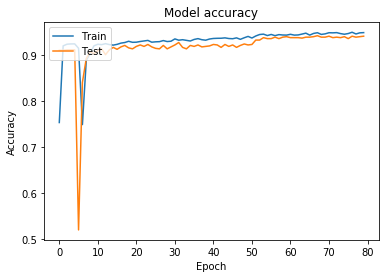

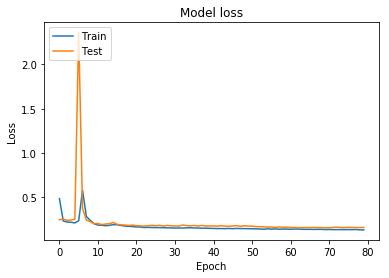

In [135]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
#plt.plot(history.history['val_recall'])
#plt.plot(history.history['val_precision'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [136]:
model.save('C:\MasterThesis\python\model_saved/lstm90_embedd40_40_lrDynamic_2019_03_31_data_augmentation_5000.h5') 

In [58]:
model2 = load_model('C:\MasterThesis\python\model_saved/lstm90_embedd40_40_lrDynamic_2019_03_01_batch60_maskzero_True_Mars3_datasetincluded.h5')

In [11]:
model = load_model('C:\MasterThesis\python\model_saved/lstm90_embedd40_40_lrDynamic_2019_03_01_batch60_maskzero_True_changed_Dictionaryvalue_Mars3included.h5')

# Choose  input and output 

In [4]:
path_spec_fail= 'C:\MasterThesis\document\Logs/Jan 11\Failed'
path_spec_pass= 'C:\MasterThesis\document\Logs/Jan 11\Passed' 
path_spec_fail_Dec= 'C:\MasterThesis\document\Logs/Dec 5\Failed'
path_spec_pass_Dec= 'C:\MasterThesis\document\Logs/Dec 5\Passed' 
path_spec_fail_Feb= 'C:\MasterThesis\document\Logs/Feb 8\Failed'
path_spec_pass_Feb= 'C:\MasterThesis\document\Logs/Feb 8\Passed' 
path_spec_fail_Jan= 'C:\MasterThesis\document\Logs/Jan 11\Failed'
path_spec_pass_Jan= 'C:\MasterThesis\document\Logs/Jan 11\Passed' 
path_spec_new='C:\MasterThesis\Generated'
#path_spec_test='C:\MasterThesis\document\Logs\Jan 25 test'
maxlength=300

In [5]:
def csvfile_collect(path):
    csv_file=[]
    for (root,dirs,files) in os.walk(path, topdown=True): 

        for loop in range(len(files)):
            if files[loop].endswith((".csv")):
                with open(root+'/'+files[loop], 'r') as csvfile:
                    contents=csvfile.read()   # contents type:str use contents.split() convert to list
                    csv_file.append(contents.split()) 
    return csv_file 

In [6]:
def csvfile_collect_for_test(path):
    csv_file=[]
    for (root,dirs,files) in os.walk(path, topdown=True): 
        file_list=files
        for loop in range(len(files)):
            if files[loop].endswith((".csv")):
                with open(root+'/'+files[loop], 'r') as csvfile:
                    contents=csvfile.read()   # contents type:str use contents.split() convert to list
                    csv_file.append(contents.split()) 
    return csv_file,file_list 

In [7]:

def quantify_data(csv_file):
    csv_quantified=np.array(csv_file)
    for case, cases in enumerate(csv_file):
        for step,steps in enumerate(csv_file[case]):
            csv_quantified[case][step]=my_dict[csv_file[case][step]]+1 # frist function is zero 
#    print(len(csv_quantified))
    return csv_quantified
   

In [8]:
csv_file_pass =csvfile_collect(path_spec_pass)
#print(len(csv_file_pass))
csv_file_fail =csvfile_collect(path_spec_fail)

csv_new = csvfile_collect(path_spec_new)

csv_file_pass =csvfile_collect(path_spec_pass)
#print(len(csv_file_pass))
csv_file_fail_Dec =csvfile_collect(path_spec_fail_Dec)
csv_file_pass_Dec =csvfile_collect(path_spec_pass_Dec)

csv_file_fail_Feb =csvfile_collect(path_spec_fail_Feb)
csv_file_pass_Feb =csvfile_collect(path_spec_pass_Feb)

csv_file_fail_Jan =csvfile_collect(path_spec_fail_Jan)
csv_file_pass_Jan =csvfile_collect(path_spec_pass_Jan)


#csv_test,csv_test_name= csvfile_collect_for_test(path_spec_test)
# print(csv_test_name)
csv_file_quantify_pass=quantify_data(csv_file_pass)
#print(len(csv_file_quantify_pass))
csv_file_quantify_fail=quantify_data(csv_file_fail)


csv_new_quantify=quantify_data(csv_new)


csv_file_quantify_pass_Dec=quantify_data(csv_file_pass_Dec)
csv_file_quantify_fail_Dec=quantify_data(csv_file_fail_Dec)

csv_file_quantify_pass_Feb=quantify_data(csv_file_pass_Feb)
csv_file_quantify_fail_Feb=quantify_data(csv_file_fail_Feb)

csv_file_quantify_pass_Jan=quantify_data(csv_file_pass_Jan)
csv_file_quantify_fail_Jan=quantify_data(csv_file_fail_Jan)
#

In [9]:
csv_file_quantified_pass = sequence.pad_sequences(csv_file_quantify_pass, maxlen=maxlength)
print(len(csv_file_quantified_pass))
csv_file_quantified_fail = sequence.pad_sequences(csv_file_quantify_fail, maxlen=maxlength)
csv_new_quantified=sequence.pad_sequences(csv_new_quantify, maxlen=maxlength)
#csv_test_quantified=sequence.pad_sequences(csv_file_test, maxlen=maxlength)
csv_file_quantified=np.concatenate((csv_file_quantified_pass,csv_file_quantified_fail),axis=0)
print(len(csv_file_quantified_pass),len(csv_file_quantified_fail),len(csv_file_quantified))
#print(len(csv_test_quantified))

csv_file_quantified_pass_Dec=sequence.pad_sequences(csv_file_quantify_pass_Dec, maxlen=maxlength)
csv_file_quantified_fail_Dec=sequence.pad_sequences(csv_file_quantify_fail_Dec, maxlen=maxlength)

csv_file_quantified_pass_Feb=sequence.pad_sequences(csv_file_quantify_pass_Feb, maxlen=maxlength)
csv_file_quantified_fail_Feb=sequence.pad_sequences(csv_file_quantify_fail_Feb, maxlen=maxlength)

csv_file_quantified_pass_Jan=sequence.pad_sequences(csv_file_quantify_pass_Jan, maxlen=maxlength)
csv_file_quantified_fail_Jan=sequence.pad_sequences(csv_file_quantify_fail_Jan, maxlen=maxlength)

0
0 0 0


In [12]:
prediction_test=model.predict(csv_file_quantified_pass, batch_size=None, verbose=0, steps=None)  # choose the input 

#prediction_binary=(prediction>0.5)
#print('output True=pass False=failed: \n', prediction_binary,len(prediction_binary))

In [14]:
passed=0
failed=0
threshold=0.1
fail_index=[]

for j,i in enumerate(prediction_test):
        if i>threshold:
            passed+=1
        else:
            failed+=1
            fail_index.append(j)
#print(fail_index)
fail_name=[]            
for i in fail_index:
#    print(i)
#    print(csv_test_name[i*2])
    fail_name.append(csv_test_name[i*2])
#print(fail_name)  
csv_file_fail,csv_file_fail_name =csvfile_collect_for_test(path_spec_fail)

for i,j in enumerate(csv_file_fail_name): 
    if j.endswith((".txt")): 
        csv_file_fail_name.pop(i)

#print(fail_name)
print('fail_name:', len(fail_name))
print('actual fail function size :', len(csv_file_fail_name) )
print('actual fail function name :', csv_file_fail_name)
#if len(common_name)<len(fail_name):
common_name=list(fail_name and csv_file_fail_name)


#else:
#    common_name=list(set(fail_name) and set(csv_file_fail_name))
#    procent=len(common_name)/(len(csv_file_fail_name)/2)
#    print(procent)
print(common_name)
print('common name size:',len(common_name))
procent=len(common_name)/(len(fail_name))
print(procent)

UnboundLocalError: local variable 'file_list' referenced before assignment

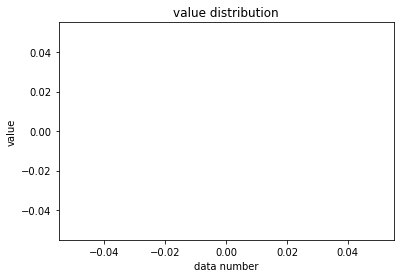

In [145]:
plt.plot(prediction_test,'.')

plt.title('value distribution')
plt.ylabel('value')
plt.xlabel('data number')
#plt.legend(['data number'], loc='upper left')
plt.show()

In [146]:
prediction_pass=model.predict(csv_file_quantified_fail, batch_size=None, verbose=0, steps=None) 

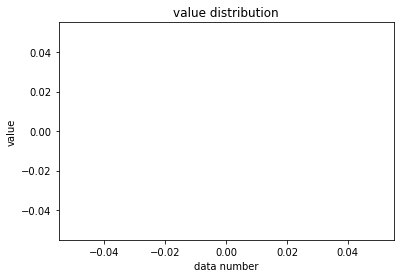

In [147]:
plt.plot(prediction_pass,'.')

plt.title('value distribution')
plt.ylabel('value')
plt.xlabel('data number')
#plt.legend(['data number'], loc='upper left')
plt.show()

In [148]:
prediction_new=model.predict(csv_new_quantified , batch_size=None, verbose=0, steps=None)  # choose the input 
print(prediction_new)

[]


In [149]:
passed=0
failed=0
threshold=0.1
for j,i in enumerate(prediction_new):
        if i>threshold:
            passed+=1
        else:
            failed+=1
print(passed,failed)

0 0


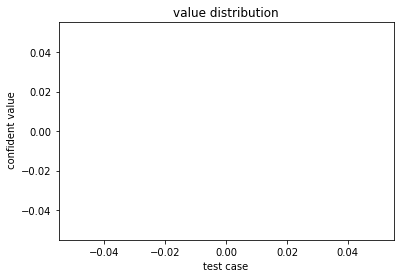

In [150]:
plt.plot(prediction_new,'.')

plt.title('value distribution')
plt.ylabel(' confident value')
plt.xlabel('test case')
#plt.legend(['data number'], loc='upper left')
plt.show()


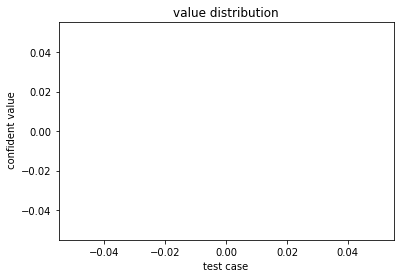

In [151]:

prediction_new=model.predict(csv_file_quantified_pass_Dec, batch_size=None, verbose=0, steps=None)  # choose the input 
plt.plot(prediction_new,'.')

plt.title('value distribution')
plt.ylabel(' confident value')
plt.xlabel('test case')
#plt.legend(['data number'], loc='upper left')
plt.show()

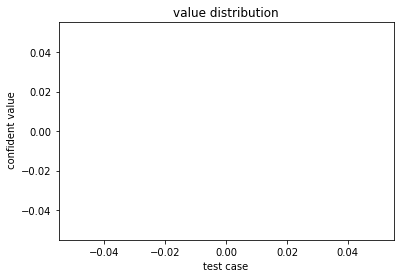

In [152]:
prediction_new=model.predict(csv_file_quantified_fail_Dec, batch_size=None, verbose=0, steps=None)  # choose the input 
plt.plot(prediction_new,'.')

plt.title('value distribution')
plt.ylabel(' confident value')
plt.xlabel('test case')
#plt.legend(['data number'], loc='upper left')
plt.show()

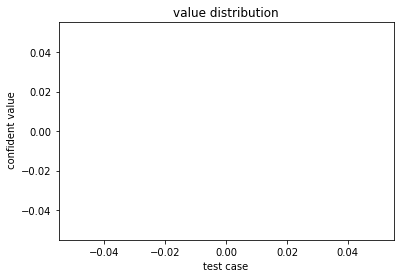

In [153]:
prediction_new=model.predict(csv_file_quantified_pass_Feb, batch_size=None, verbose=0, steps=None)  # choose the input 
plt.plot(prediction_new,'.')

plt.title('value distribution')
plt.ylabel(' confident value')
plt.xlabel('test case')
#plt.legend(['data number'], loc='upper left')
plt.show()

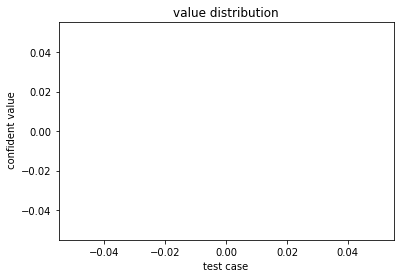

In [154]:
prediction_new=model.predict(csv_file_quantified_fail_Feb, batch_size=None, verbose=0, steps=None)  # choose the input 
plt.plot(prediction_new,'.')

plt.title('value distribution')
plt.ylabel(' confident value')
plt.xlabel('test case')
#plt.legend(['data number'], loc='upper left')
plt.show()

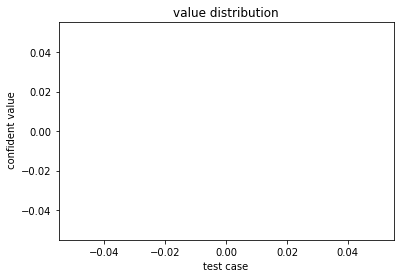

In [155]:
prediction_new=model.predict(csv_file_quantified_pass_Jan, batch_size=None, verbose=0, steps=None)  # choose the input 
plt.plot(prediction_new,'.')

plt.title('value distribution')
plt.ylabel(' confident value')
plt.xlabel('test case')
#plt.legend(['data number'], loc='upper left')
plt.show()

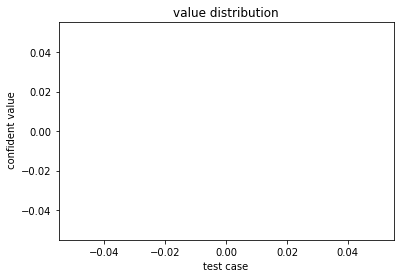

In [156]:
prediction_new=model.predict(csv_file_quantified_fail_Jan, batch_size=None, verbose=0, steps=None)  # choose the input 
plt.plot(prediction_new,'.')

plt.title('value distribution')
plt.ylabel(' confident value')
plt.xlabel('test case')
#plt.legend(['data number'], loc='upper left')
plt.show()

In [15]:
count=0
for (root,dirs,files) in os.walk('C:\MasterThesis\document\Logs/untrained dataset', topdown=True): 
    if count==0:
        folder_name=dirs
    count+=1
print(folder_name)

['Feb 19 (crash)', 'Feb 22', 'Feb 25', 'Jan 10']


In [166]:
maxlength=300
procent={}
total_failedcase_wrong=0
total_failedcase_right=0
total_passedcase_wrong=0
total_passedcase_right=0
threshold=0.9
print('filter threshold:',threshold)
for k in folder_name:
    
    Jan25_fail= 'C:\MasterThesis\document\Logs/untrained dataset/'+k+'/Failed'
    csv_Jan25_fail =csvfile_collect(Jan25_fail)
    Jan25_quantify_fail=quantify_data(csv_Jan25_fail)
    Jan25_quantified_fail = sequence.pad_sequences(Jan25_quantify_fail, maxlen=maxlength)
    prediction_fail=model.predict(Jan25_quantified_fail, batch_size=None, verbose=0, steps=None) 

    Jan25_pass= 'C:\MasterThesis\document\Logs/untrained dataset/'+k+'/Passed'
    csv_Jan25_pass =csvfile_collect(Jan25_pass)
    Jan25_quantify_pass=quantify_data(csv_Jan25_pass)
    Jan25_quantified_pass = sequence.pad_sequences(Jan25_quantify_pass, maxlen=maxlength)
    prediction_pass=model.predict(Jan25_quantified_pass, batch_size=None, verbose=0, steps=None) 

    above_threshold_pass=0
    under_threshold_pass=0
    
    for j,i in enumerate(prediction_pass):
            if i>threshold:
                above_threshold_pass+=1
            else:
                under_threshold_pass+=1
    print(k)
    print('Predict correct threshold for pass case',above_threshold_pass)
    print('Predict wrong threshold for pass case',under_threshold_pass)

    above_threshold_fail=0
    under_threshold_fail=0

    for j,i in enumerate(prediction_fail):
            if i>threshold:
                above_threshold_fail+=1
            else:
                under_threshold_fail+=1

    print('Predict wrong threshold for fail case',above_threshold_fail)
    print('Predict correct threshold for fail case',under_threshold_fail)
    
    total_failedcase_wrong+=above_threshold_fail
    total_failedcase_right+=under_threshold_fail
    
    total_passedcase_wrong+=under_threshold_pass
    total_passedcase_right+=above_threshold_pass   
print('####################')
print('total wrong predict failed test case:',total_failedcase_wrong)
print('total correct predict failed test case:',total_failedcase_right)
print('total wrong predict passed test case:',total_passedcase_wrong)
print('total correct predict passed test case:',total_passedcase_right)

total=total_failedcase_wrong+total_failedcase_right+total_passedcase_wrong+total_passedcase_right

print('Time save procentage:',1-(total_passedcase_wrong+total_failedcase_right)/total )
print('Fail cases contain procentage:',total_failedcase_right/(total_failedcase_wrong+total_failedcase_right) )

filter threshold: 0.9
Feb 19 (crash)
Predict correct threshold for pass case 124
Predict wrong threshold for pass case 45
Predict wrong threshold for fail case 0
Predict correct threshold for fail case 17
Feb 22
Predict correct threshold for pass case 291
Predict wrong threshold for pass case 207
Predict wrong threshold for fail case 1
Predict correct threshold for fail case 1
Feb 25
Predict correct threshold for pass case 1095
Predict wrong threshold for pass case 728
Predict wrong threshold for fail case 2
Predict correct threshold for fail case 3
Jan 10
Predict correct threshold for pass case 37
Predict wrong threshold for pass case 18
Predict wrong threshold for fail case 0
Predict correct threshold for fail case 8
####################
total wrong predict failed test case: 3
total correct predict failed test case: 29
total wrong predict passed test case: 998
total correct predict passed test case: 1547
Time save procentage: 0.6014745828482733
Fail cases contain procentage: 0.90625


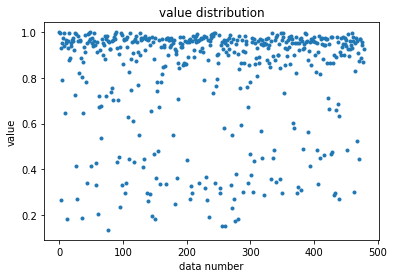

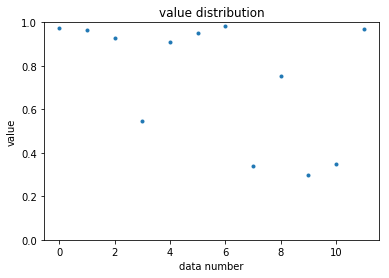

In [163]:
maxlength=300
#Jan25_fail= 'C:\MasterThesis\document\Logs/untrained dataset/'++'/Failed'
Jan25_fail= 'C:\MasterThesis\document\Logs/Mars 6 (extli) balder/Failed'
csv_Jan25_fail =csvfile_collect(Jan25_fail)
Jan25_quantify_fail=quantify_data(csv_Jan25_fail)
Jan25_quantified_fail = sequence.pad_sequences(Jan25_quantify_fail, maxlen=maxlength)
prediction_fail=model.predict(Jan25_quantified_fail, batch_size=None, verbose=0, steps=None) 
#'C:\MasterThesis\document\Logs/log files/Okt 31/Passed'
Jan25_pass= 'C:\MasterThesis\document\Logs/Mars 6 (extli) balder/Passed'
csv_Jan25_pass =csvfile_collect(Jan25_pass)
Jan25_quantify_pass=quantify_data(csv_Jan25_pass)
Jan25_quantified_pass = sequence.pad_sequences(Jan25_quantify_pass, maxlen=maxlength)
prediction_pass=model.predict(Jan25_quantified_pass, batch_size=None, verbose=0, steps=None) 

plt.plot(prediction_pass,'.')

plt.title('value distribution')
plt.ylabel('value')
plt.xlabel('data number')
#plt.legend(['data number'], loc='upper left')

plt.show()

plt.plot(prediction_fail,'.')

plt.title('value distribution')
plt.ylim(0, 1)
plt.ylabel('value')

plt.xlabel('data number')
#plt.legend(['data number'], loc='upper left')
plt.show()

In [17]:
maxlength=300
procent={}
total_failedcase_wrong=0
total_failedcase_right=0
total_passedcase_wrong=0
total_passedcase_right=0
above_threshold_pass=0
under_threshold_pass=0
threshold=0.4
print('filter threshold:',threshold)
for j,i in enumerate(prediction_pass):
        if i>threshold:
            above_threshold_pass+=1
        else:
            under_threshold_pass+=1

print('Predict correct threshold for pass case',above_threshold_pass)
print('Predict wrong threshold for pass case',under_threshold_pass)

above_threshold_fail=0
under_threshold_fail=0

for j,i in enumerate(prediction_fail):
        if i>threshold:
            above_threshold_fail+=1
        else:
            under_threshold_fail+=1

print('Predict wrong threshold for fail case',above_threshold_fail)
print('Predict correct threshold for fail case',under_threshold_fail)
    

filter threshold: 0.4


NameError: name 'prediction_pass' is not defined

In [16]:
path_spec_fail= 'C:\MasterThesis\document\Logs/Mars 6 (extli) balder/Failed'


passed=0
failed=0
threshold=0.8
fail_index=[]

for j,i in enumerate(prediction_fail):
        if i>threshold:
            passed+=1
        else:
            failed+=1
            fail_index.append(j)
#print(fail_index)
fail_name=[]            
for i in fail_index:
#    print(i)
#    print(csv_test_name[i*2])
    fail_name.append(csv_test_name[i*2])
#print(fail_name)  
csv_file_fail,csv_file_fail_name =csvfile_collect_for_test(path_spec_fail)

for i,j in enumerate(csv_file_fail_name): 
    if j.endswith((".txt")): 
        csv_file_fail_name.pop(i)

#print(fail_name)
print(' predict fail_name:', len(fail_name),fail_name)
print('actual fail function size :', len(csv_file_fail_name) )
print('actual fail function name :', csv_file_fail_name)
#if len(common_name)<len(fail_name):
common_name=list(fail_name and csv_file_fail_name)


#else:
#    common_name=list(set(fail_name) and set(csv_file_fail_name))
#    procent=len(common_name)/(len(csv_file_fail_name)/2)
#    print(procent)
#print(common_name)
#print('common name size:',len(common_name))
#procent=len(common_name)/(len(fail_name))

print(procent)

NameError: name 'prediction_fail' is not defined

In [ ]:
['test_case_117.csv', 'test_case_152.csv', 'test_case_223.csv', 'test_case_325.csv', 'test_case_367.csv', 'test_case_481.csv', 'test_case_84.csv']

In [11]:
maxlength=300

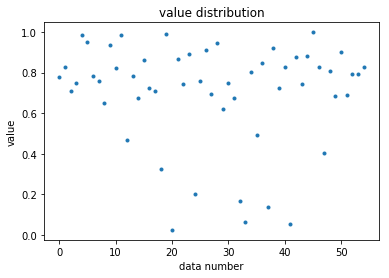

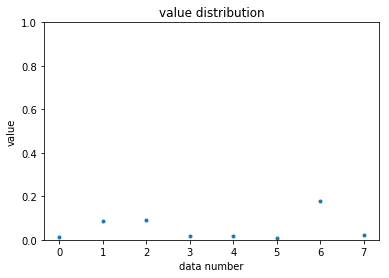

In [164]:
Jan25_fail= 'C:\MasterThesis\document\Logs/untrained dataset\Jan 10/Failed'
csv_Jan25_fail =csvfile_collect(Jan25_fail)
Jan25_quantify_fail=quantify_data(csv_Jan25_fail)
Jan25_quantified_fail = sequence.pad_sequences(Jan25_quantify_fail, maxlen=maxlength)
prediction_fail=model2.predict(Jan25_quantified_fail, batch_size=None, verbose=0, steps=None) 

Jan25_pass= 'C:\MasterThesis\document\Logs/untrained dataset\Jan 10/Passed'
csv_Jan25_pass =csvfile_collect(Jan25_pass)
Jan25_quantify_pass=quantify_data(csv_Jan25_pass)
Jan25_quantified_pass = sequence.pad_sequences(Jan25_quantify_pass, maxlen=maxlength)
prediction_pass=model2.predict(Jan25_quantified_pass, batch_size=None, verbose=0, steps=None) 

plt.plot(prediction_pass,'.')

plt.title('value distribution')
plt.ylabel('value')
plt.xlabel('data number')
#plt.legend(['data number'], loc='upper left')

plt.show()


plt.plot(prediction_fail,'.')

plt.title('value distribution')
plt.ylim(0, 1)
plt.ylabel('value')

plt.xlabel('data number')
#plt.legend(['data number'], loc='upper left')
plt.show()

In [165]:
maxlength=300
procent={}
total_failedcase_wrong=0
total_failedcase_right=0
total_passedcase_wrong=0
total_passedcase_right=0
above_threshold_pass=0
under_threshold_pass=0
threshold=0.8
print('filter threshold:',threshold)
for j,i in enumerate(prediction_pass):
        if i>threshold:
            above_threshold_pass+=1
        else:
            under_threshold_pass+=1

print('Predict correct threshold for pass case',above_threshold_pass)
print('Predict wrong threshold for pass case',under_threshold_pass)

above_threshold_fail=0
under_threshold_fail=0

for j,i in enumerate(prediction_fail):
        if i>threshold:
            above_threshold_fail+=1
        else:
            under_threshold_fail+=1

print('Predict wrong threshold for fail case',above_threshold_fail)
print('Predict correct threshold for fail case',under_threshold_fail)
    

filter threshold: 0.8
Predict correct threshold for pass case 23
Predict wrong threshold for pass case 32
Predict wrong threshold for fail case 0
Predict correct threshold for fail case 8
